In [1]:
import numpy as np
from ClassMPC import SampleMPC

mpcobj = SampleMPC(Np =)

In [2]:
mpcobj.mpc_lti_system()

'Completed'

In [3]:
# Collect System Matrix
(Ao, b), (lb, ub) = mpcobj.system_matrix()

In [4]:
import pyomo.environ as pyo
from model_obj import mpc_lti_system

m = mpc_lti_system(mpcobj, Np=24)

solver = pyo.SolverFactory("gurobi")
results = solver.solve(m)  # .write
m.obj.display()

In [6]:
DU = np.array([m.u[i](i) for i in range(mpcobj.Np)])

u = np.dot(mpcobj.E, mpcobj.uk) + np.dot(mpcobj.H, DU)[:, None]

# Apply first control
uk = u[: mpcobj.nu, 0][0]

xt = np.zeros((2, mpcobj.Np))
dut = np.zeros(mpcobj.Np)
ut = np.zeros(mpcobj.Np)
yt = np.zeros(mpcobj.Np)

y = mpcobj.W @ mpcobj.xa + mpcobj.Z @ DU

for i in range(1, mpcobj.Np):
    xt[:, i] = mpcobj.A @ xt[:, i - 1] + (mpcobj.B * u[i - 1])[:, 0]

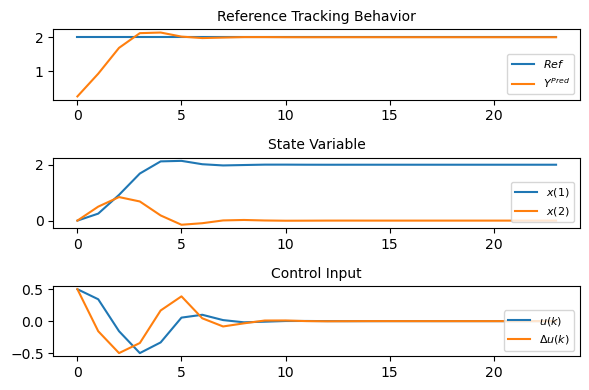

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 4))
Ref = 2 * np.ones(mpcobj.Np)
plt.subplot(3, 1, 1)
plt.plot(Ref, label="$Ref$")
plt.plot(y, label="$Y^{Pred}$")
plt.title("Reference Tracking Behavior", fontsize=10)
plt.legend(loc=4, prop={"size": 8})

plt.subplot(3, 1, 2)
plt.plot(xt[0, :], label="$x(1)$")
plt.plot(xt[1, :], label="$x(2)$")
plt.title("State Variable", fontsize=10)
plt.legend(loc=4, prop={"size": 8})


plt.subplot(3, 1, 3)
plt.plot(u, label="$u(k)$")
plt.plot(DU, label="$\\Delta u(k)$")
plt.title("Control Input", fontsize=10)
plt.legend(loc=4, prop={"size": 8})


plt.tight_layout()